 #  A Whale off the Portfolio
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.


## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

print(whale_returns.shape)
whale_returns.sample(3)

(1060, 4)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2018-09-11,0.001953,-0.004287,0.007189,0.006222
2017-05-10,0.005238,0.000090,0.001549,0.009197
2017-01-18,-0.001701,-0.001651,0.003849,-0.000589


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls and Check Result
whale_returns = whale_returns.dropna().copy()
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

print(algo_returns.shape)
algo_returns.sample(3)

(1241, 2)


,Algo 1,Algo 2
Date,,
2016-10-21,-0.000477,-0.000884
2018-10-23,-0.001662,-0.009046
2016-08-09,0.002393,-0.002178


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls and Check Result
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_path = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

print(sp_tsx_history.shape)
sp_tsx_history.sample(3)

(1818, 1)


,Close
Date,
2014-08-13,"$15,262.73"
2018-05-18,"$16,162.31"
2015-01-30,"$14,673.48"


In [9]:
# Check Data Types
print(sp_tsx_history["Close"].dtypes)

# Check the first close price data type
print(type(sp_tsx_history.iloc[0,0]))

object
<class 'str'>


In [10]:
# Fix Data Types by Replacing "$" and "," 
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$","")
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",","")
sp_tsx_history["Close"] = sp_tsx_history["Close"].astype("float")

# Check Data Types
print(sp_tsx_history["Close"].dtypes)
print(type(sp_tsx_history.iloc[0,0]))

float64
<class 'numpy.float64'>


In [11]:
# Check Index and Sort Datetime
print(sp_tsx_history.index)
sp_tsx_history = sp_tsx_history.sort_index()
sp_tsx_history.head(3)

DatetimeIndex(['2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04',
               '2012-10-05', '2012-10-09', '2012-10-10', '2012-10-11',
               '2012-10-12', '2012-10-15',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=1818, freq=None)


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47


In [12]:
# Calculate Daily Returns
sp_tsx_returns = (sp_tsx_history-sp_tsx_history.shift(1))/sp_tsx_history.shift(1)
sp_tsx_returns.head(3)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563


In [13]:
# Drop nulls and Check
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.isnull().sum()

Close    0
dtype: int64

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.columns = ["SP_TSX"]
sp_tsx_returns.head(3)

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis = "columns", join="inner").sort_index()

print(joined_returns.shape)
joined_returns.head()

(1029, 7)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

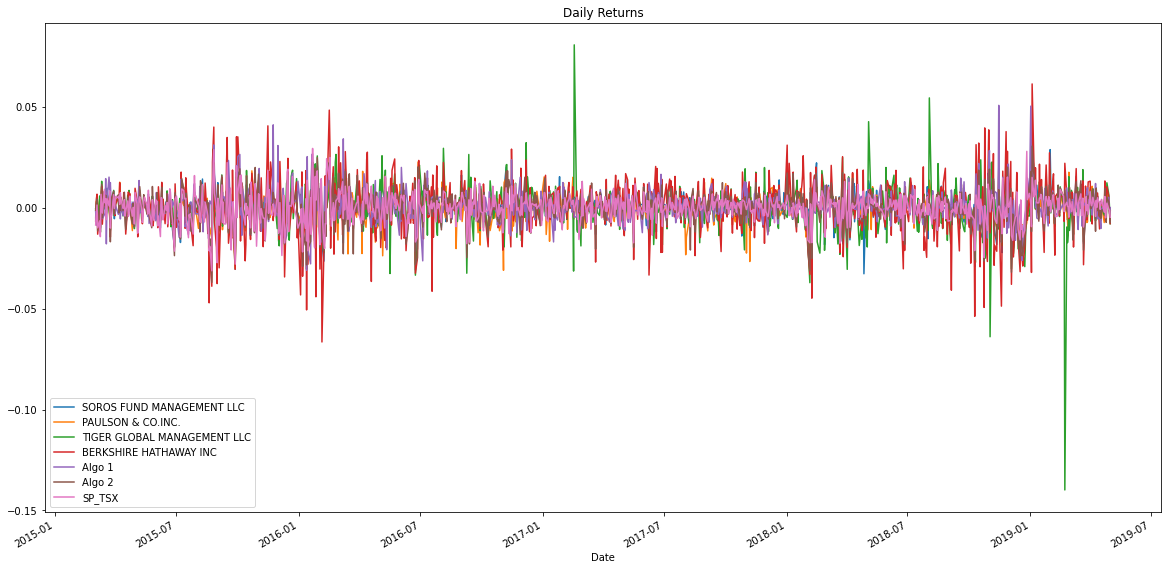

In [16]:
# Plot daily returns of all portfolios
joined_returns.plot(figsize=(20,10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

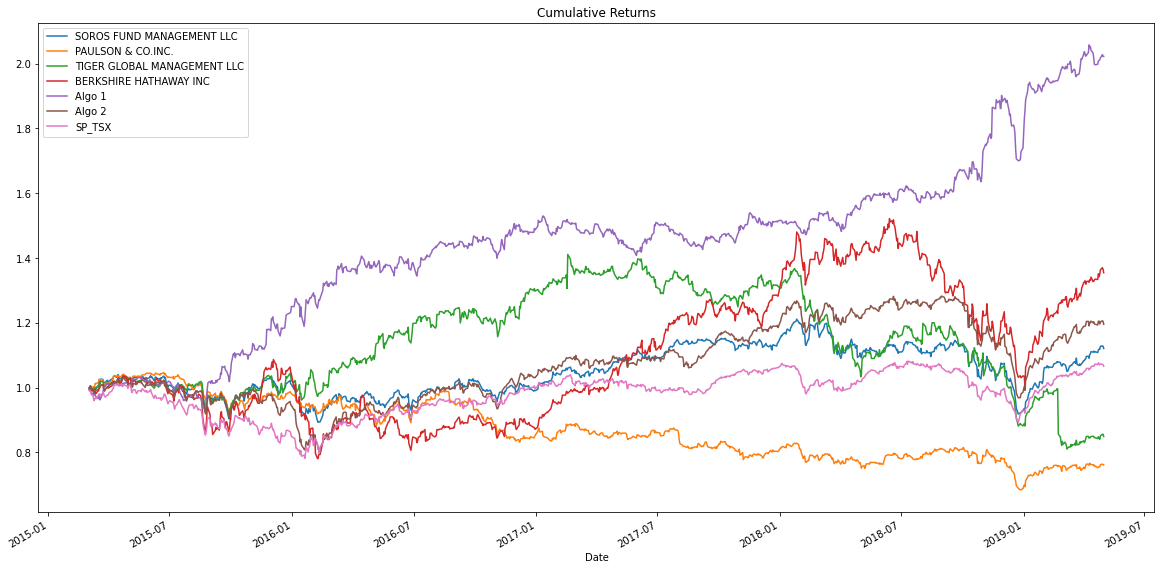

In [17]:
# Calculate cumulative returns of all portfolios
joined_cumulative_returns = (1 + joined_returns).cumprod()
# Plot cumulative returns
joined_cumulative_returns.plot(figsize=(20,10), title= "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


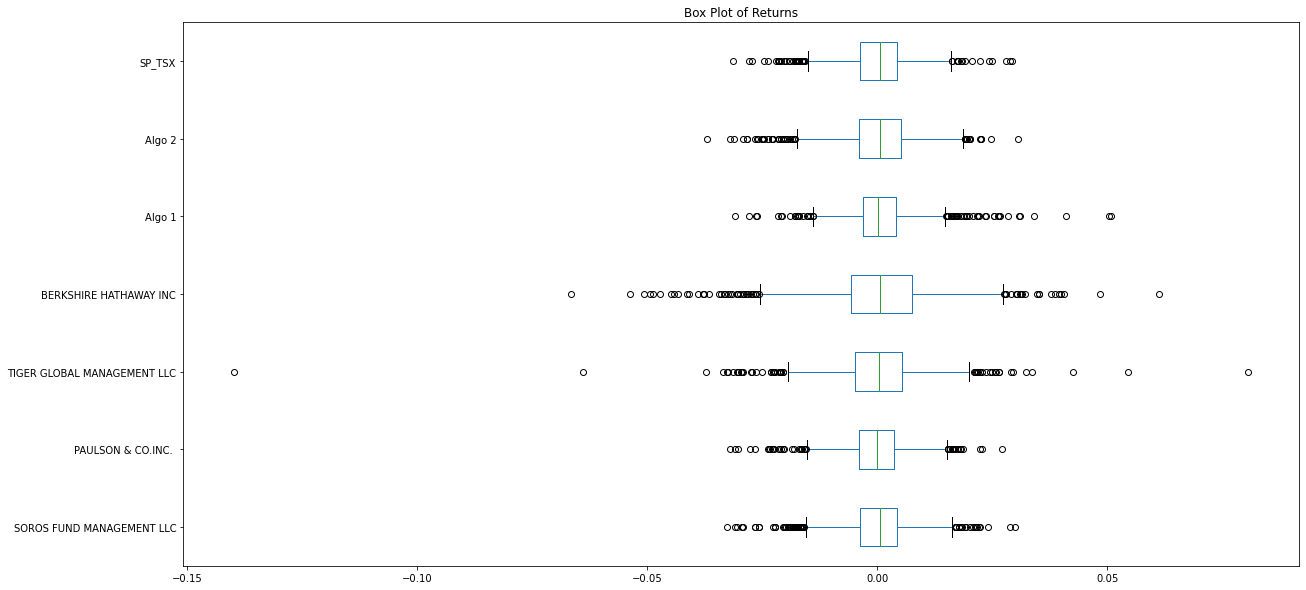

In [18]:
# Box plot of Daily Returns to visually show risk
joined_returns.plot.box(vert=False,figsize=(20,10), title="Box Plot of Returns")

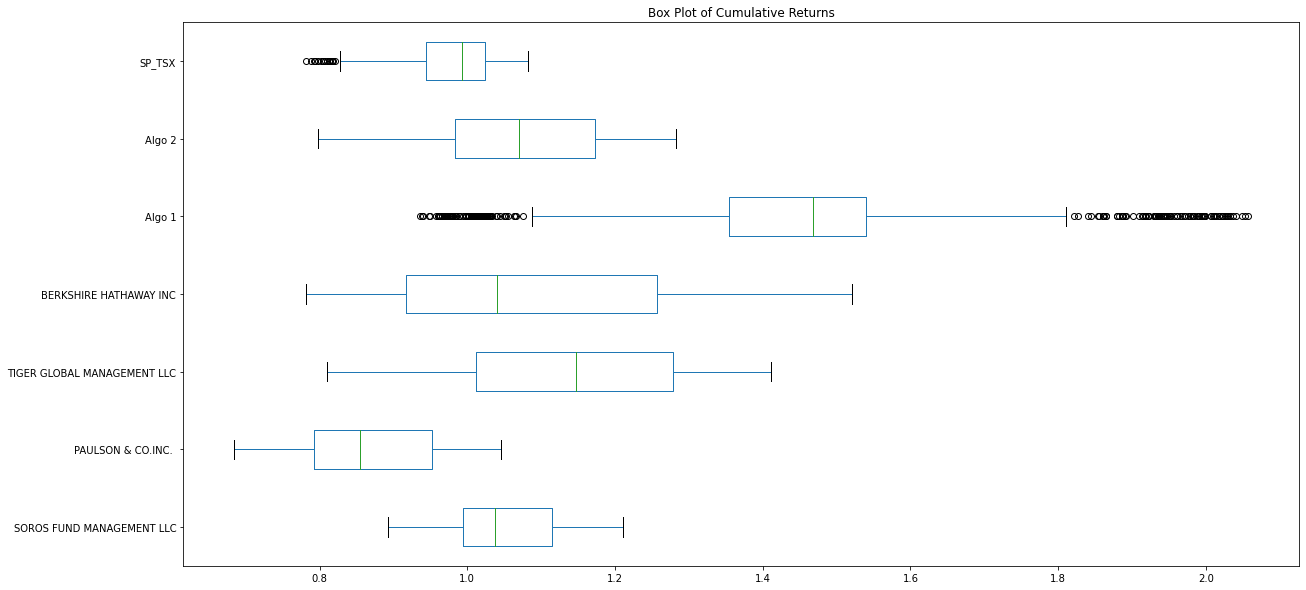

In [19]:
# Box plot of Cumulative Returns
joined_cumulative_returns.plot.box(vert=False,figsize=(20,10), title="Box Plot of Cumulative Returns")

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
daily_std = joined_returns.std()

# Creating a Sorted standard deviation dataframe
daily_std = pd.DataFrame(joined_returns.std(),columns=["Std"])
daily_std.sort_values("Std",ascending=False)

,Std
BERKSHIRE HATHAWAY INC,0.012826
TIGER GLOBAL MANAGEMENT LLC,0.010883
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
Algo 1,0.007589
SP_TSX,0.007034
PAULSON & CO.INC.,0.006982


### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
filtered_df = daily_std.loc[daily_std["Std"] > daily_std.loc["SP_TSX","Std"]]
filtered_df.head()

,Std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


In [22]:
print("Portfolios: " + ",  ".join(list(filtered_df.index)) + " are risker than the S&P TSX60.")

Portfolios: SOROS FUND MANAGEMENT LLC,  TIGER GLOBAL MANAGEMENT LLC,  BERKSHIRE HATHAWAY INC,  Algo 1,  Algo 2 are risker than the S&P TSX60.


#### Portfolios: SOROS FUND MANAGEMENT LLC,  TIGER GLOBAL MANAGEMENT LLC,  BERKSHIRE HATHAWAY INC,  Algo 1,  Algo 2 are risker than the S&P TSX60.

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days) SoRos 0.124259
annualized_std = daily_std * np.sqrt(252) 
annualized_std.columns = ["annualized_std"]
annualized_std.sort_values("annualized_std",ascending=False)

,annualized_std
BERKSHIRE HATHAWAY INC,0.203599
TIGER GLOBAL MANAGEMENT LLC,0.172759
Algo 2,0.132177
SOROS FUND MANAGEMENT LLC,0.124259
Algo 1,0.120470
SP_TSX,0.111664
PAULSON & CO.INC.,0.110841


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

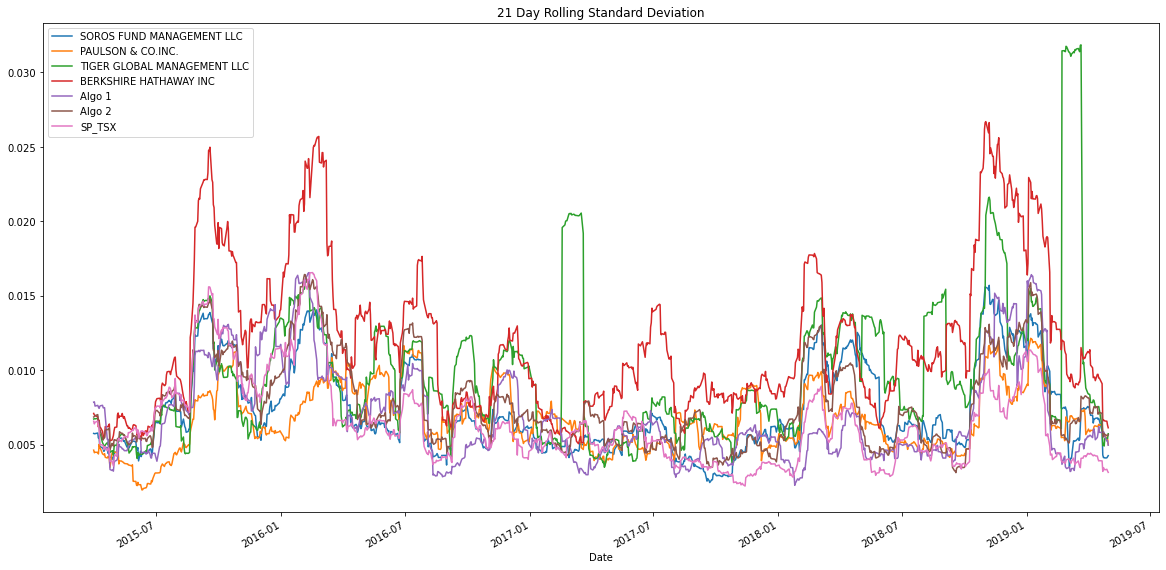

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize = (20,10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation_df = joined_returns.corr()

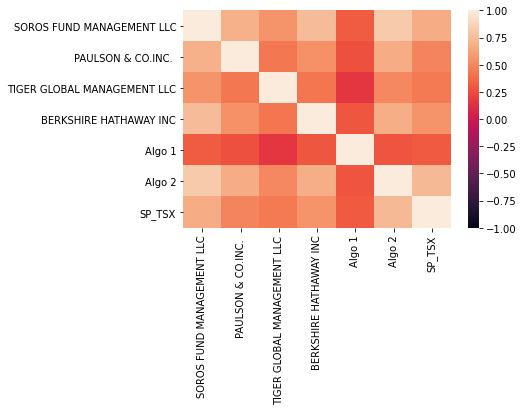

In [26]:
# Plot Correlation Heatmap
import seaborn as sns
sns.heatmap(correlation_df, vmin=-1, vmax=1)

In [27]:
# Display de correlation matrix
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [28]:
# Sort the Correlation of Each Stock with S&P TSX
sorted_correlation = correlation_df["SP_TSX"].sort_values(ascending=False).to_frame()
sorted_correlation

,SP_TSX
SP_TSX,1.000000
Algo 2,0.737370
SOROS FUND MANAGEMENT LLC,0.673930
BERKSHIRE HATHAWAY INC,0.557250
PAULSON & CO.INC.,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.440583
Algo 1,0.310276


In [29]:
# Return a Stock that has the Highest Correlation with S&P TSX
selected_portfolio = list(sorted_correlation.index)[1]
print(f"{selected_portfolio} may mimick the S&P TSX60, as it has the highest correlation with the index for the analysed period.")

Algo 2 may mimick the S&P TSX60, as it has the highest correlation with the index for the analysed period.


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio
covariance_df = joined_returns[str(selected_portfolio)].cov(joined_returns["SP_TSX"])

# Calculate variance of S&P TSX60
SP_TSX_variance = joined_returns["SP_TSX"].var()

# Computing beta
beta = covariance_df / SP_TSX_variance
beta

0.8728267344999652

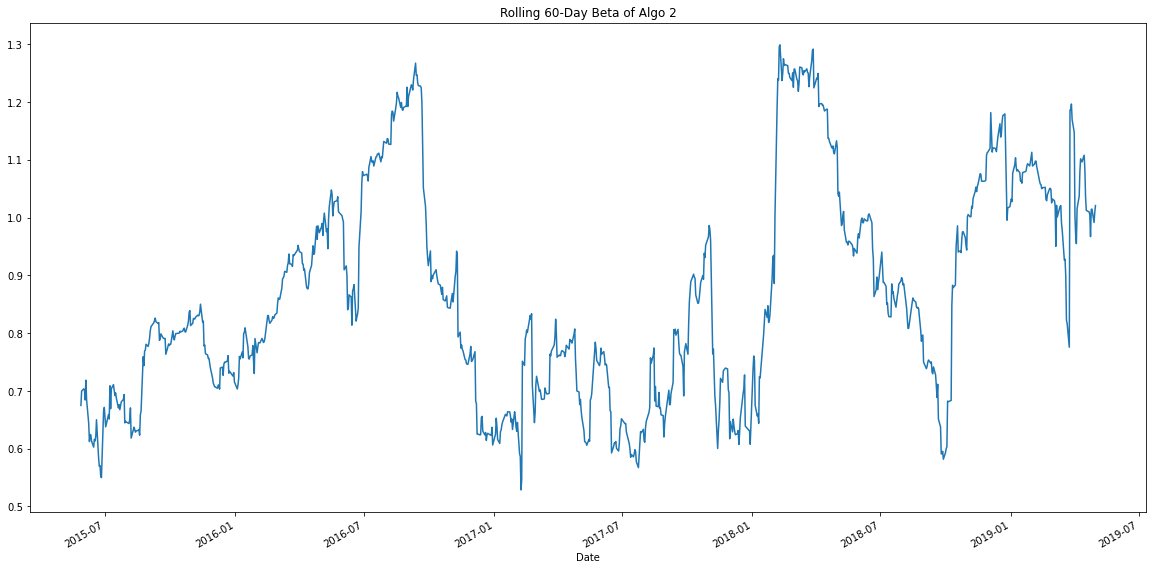

In [31]:
# Calculate 60 Days Rolling Covariance of the Selected Portfolio vs. S&P TSX60
rolling_covariance = joined_returns[str(selected_portfolio)].rolling(window=60).cov(joined_returns["SP_TSX"])

# Calculate 60 Days Rolling variance of S&P TSX60
rolling_variance = joined_returns["SP_TSX"].rolling(window=60).var()

# Calculate 60 Days Rolling Beta of Selected Portfolio
rolling_beta = rolling_covariance / rolling_variance

# Plot the 60 Days Rolling Beta
rolling_beta.plot(figsize=(20,10),title=f"Rolling 60-Day Beta of {selected_portfolio}")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

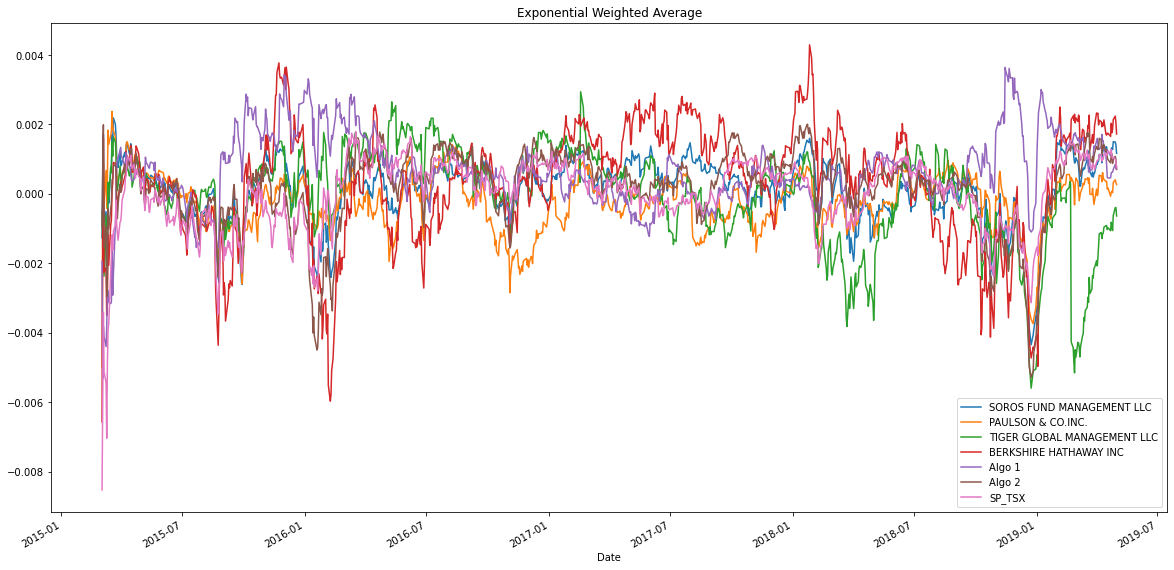

In [32]:
# Use `ewm` Exponentially Weighted Windows to calculate Exponential Weighted Moving Average with 21-day half-life
rolling_ewm = joined_returns.ewm(halflife=21).mean()

# Plot the Exponential Weighted Average
rolling_ewm.plot(figsize=(20,10),title="Exponential Weighted Average")

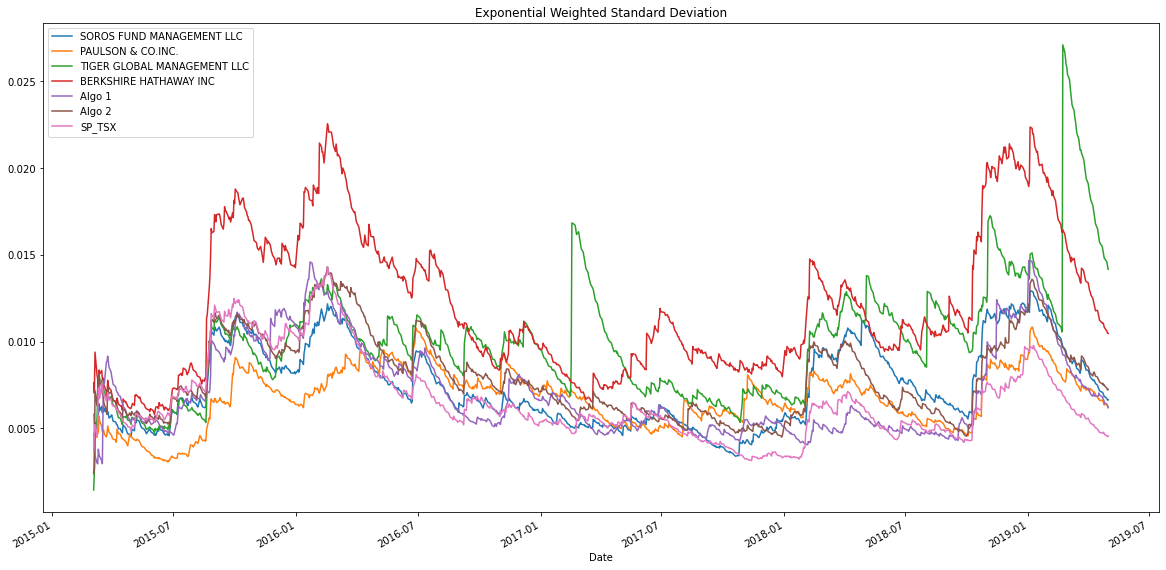

In [33]:
# Use `ewm` Exponentially Weighted Windows to calculate Exponential Weighted Standard Deviation with 21-day half-life
rolling_ewm = joined_returns.ewm(halflife=21).std()

# Plot the Exponential Weighted Standard Deviation
rolling_ewm.plot(figsize=(20,10),title="Exponential Weighted Standard Deviation")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = joined_returns.mean()*252 / annualized_std["annualized_std"]
sorted_sharpe_ratios = sharpe_ratios.sort_values(ascending=False).to_frame(name="sharpe_ratios")
sorted_sharpe_ratios

,sharpe_ratios
Algo 1,1.491514
BERKSHIRE HATHAWAY INC,0.467045
Algo 2,0.396817
SOROS FUND MANAGEMENT LLC,0.286709
SP_TSX,0.195550
TIGER GLOBAL MANAGEMENT LLC,-0.144455
PAULSON & CO.INC.,-0.547594


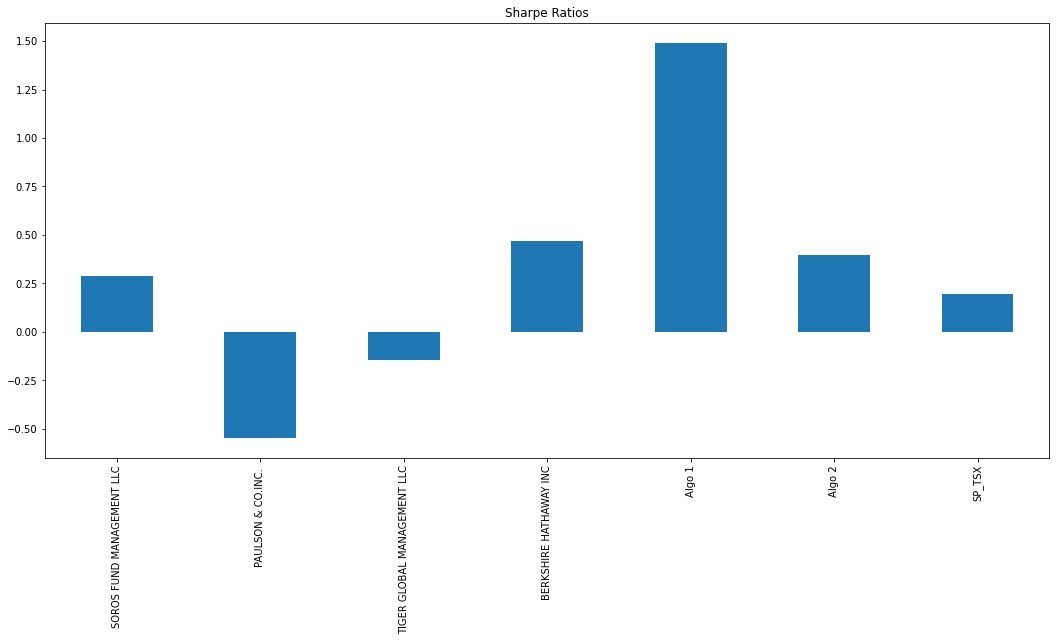

In [35]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(18,8),title="Sharpe Ratios")

In [36]:
# The Highest Sharpe Ratio Portfolio:
print(f"The Highest Sharpe Ratio Portfolio is {list(sorted_sharpe_ratios.index)[0]}")

The Highest Sharpe Ratio Portfolio is Algo 1


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Algo 1 outperforms both the market (S&P TSX 60) and the whales portfolios. Algo 1 has the highest sharpe ratio, which means that, for the same amount of risk, it has the highest returns/rewards than the the whales portfolios and the market (S&P TSX 60).

Algo 2 outperforms the market (S&P TSX 60) and most of the whales portfolios, but it underperforms BERKSHIRE HATHAWAY INC. As BERKSHIRE HATHAWAY has higher sharpe ratio than Algo2.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [37]:
# Reading data from 1st stock
shop_history_path = Path("Resources/shop_historical.csv")
shop_history = pd.read_csv(shop_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Drop Symbol Column and Replace "close" to Symbol
shop_history = shop_history.drop(columns=["Symbol"]).copy()
shop_history.columns = ["SHOP"]

print(shop_history.shape)
shop_history.head(3)

(501, 1)


,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46


In [38]:
# Reading data from 2nd stock
otex_history_path = Path("Resources/otex_historical.csv")
otex_history = pd.read_csv(otex_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Drop Symbol Column and Replace "close" to Symbol
otex_history = otex_history.drop(columns=["Symbol"]).copy()
otex_history.columns = ["OTEX"]

print(otex_history.shape)
otex_history.head(3)

(501, 1)


,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91


In [39]:
# Reading data from 3rd stock
l_history_path = Path("Resources/l_historical.csv")
l_history = pd.read_csv(l_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Drop Symbol Column and Replace "close" to Symbol
l_history = l_history.drop(columns=["Symbol"]).copy()
l_history.columns = ["L"]

print(l_history.shape)
l_history.head(3)

(501, 1)


,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42


In [40]:
# Combine all stocks in a single DataFrame
combined_history = pd.concat([shop_history, otex_history, l_history], axis="columns", join="inner").sort_index()
print(combined_history.shape)
combined_history.head(3)

(501, 3)


,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42


In [41]:
# Calculate daily returns
combined_returns = combined_history.pct_change()

# Drop NAs
combined_returns = combined_returns.dropna()

# Display sample data
combined_returns.head(3)

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = combined_returns.dot(weights).rename("My Portfolio")

# Display sample data
print(my_portfolio_returns.shape)
my_portfolio_returns.head(3)

(500,)


Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
aggregated_returns = pd.concat([joined_returns, my_portfolio_returns], axis="columns", join="inner")
aggregated_returns.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126


In [44]:
# Check Null
aggregated_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP_TSX                         0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std` for 252 Trading Days
aggregated_annualized_std = aggregated_returns.std() * np.sqrt(252)
aggregated_annualized_std

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
SP_TSX                         0.099121
My Portfolio                   0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

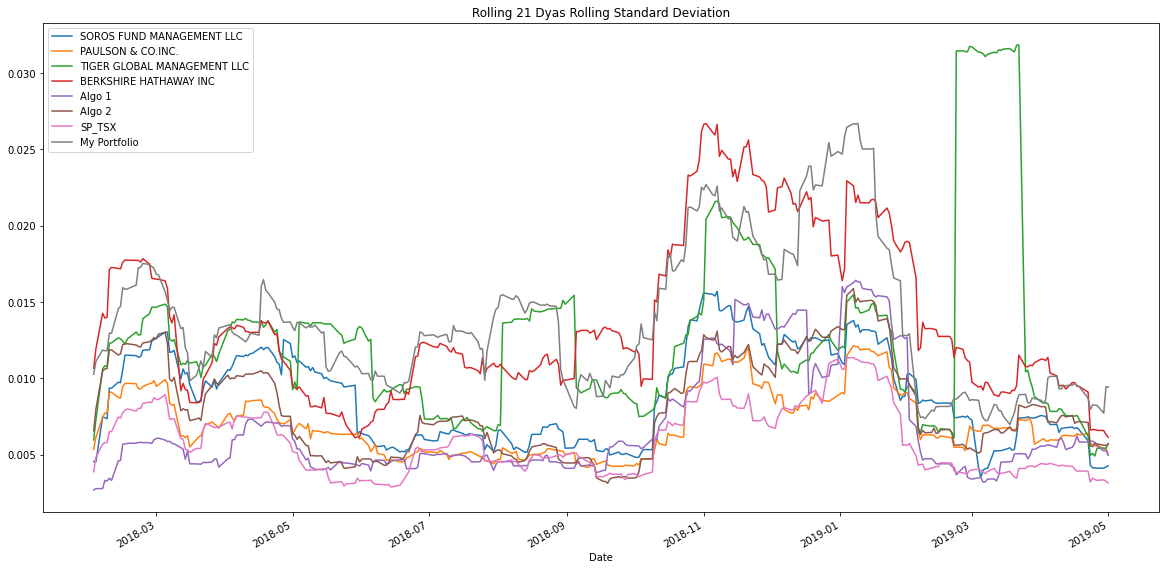

In [46]:
# Calculate rolling standard deviation
aggregated_rolling_std = aggregated_returns.rolling(window=21).std()

# Plot rolling standard deviation
aggregated_rolling_std.plot(figsize=(20,10), title="Rolling 21 Dyas Rolling Standard Deviation")

### Calculate and plot the correlation

In [47]:
# Calculate the correlation
aggregated_correlation = aggregated_returns.corr()
aggregated_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
SP_TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
My Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


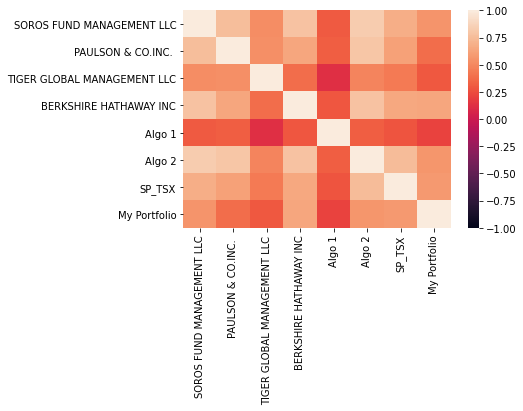

In [48]:
# Plot Correlation
sns.heatmap(aggregated_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

In [49]:
# Calculate 60-day rolling beta
my_portfolio_rolling_covariance = aggregated_returns["My Portfolio"].rolling(window=60).cov(aggregated_returns["SP_TSX"])
my_portfolio_rolling__variance = aggregated_returns["My Portfolio"].rolling(window=60).var()
my_portfolio_rolling__beta = my_portfolio_rolling_covariance / my_portfolio_rolling__variance

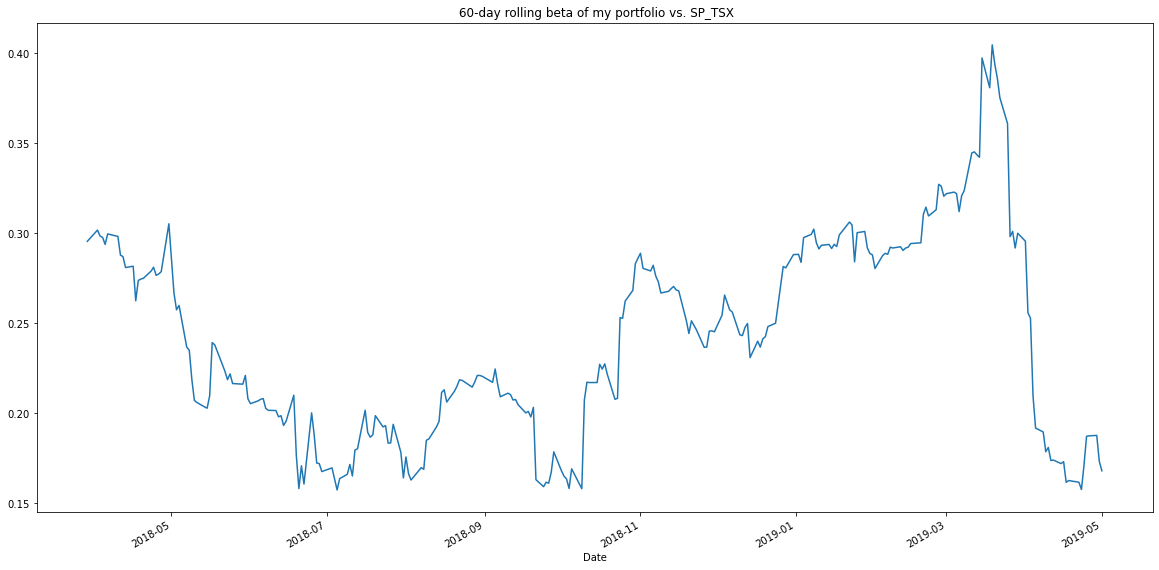

In [50]:
# Plot My Portfolio 60-day rolling beta
my_portfolio_rolling__beta.plot(figsize=(20,10),title=" 60-day rolling beta of my portfolio vs. SP_TSX")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = aggregated_returns.mean()*252 / aggregated_annualized_std
sorted_sharpe_ratios2 = sharpe_ratios2.sort_values(ascending=False).to_frame(name="sharpe_ratios2")
sorted_sharpe_ratios2

,sharpe_ratios2
Algo 1,1.901461
My Portfolio,1.564547
BERKSHIRE HATHAWAY INC,0.195907
SP_TSX,0.034651
Algo 2,0.021394
SOROS FUND MANAGEMENT LLC,-0.088196
PAULSON & CO.INC.,-0.396282
TIGER GLOBAL MANAGEMENT LLC,-1.391612


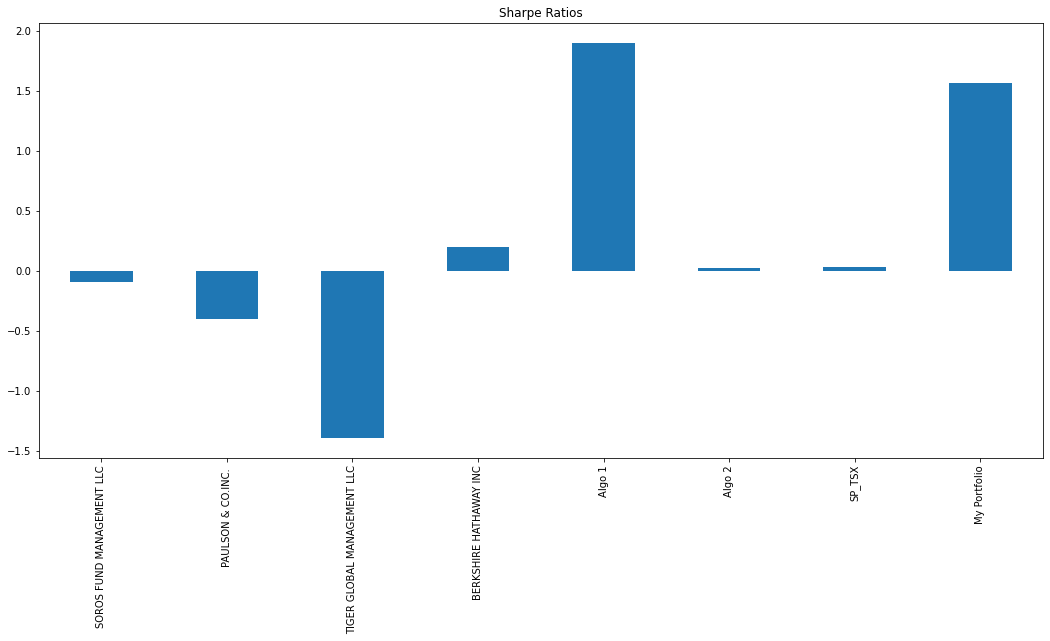

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(figsize=(18,8),title="Sharpe Ratios")

### How does your portfolio do?


My portfolio outperforms the market portfolio SP TSX60, Algo2 and Whales portfolios. As my portfolio has higher shape ratio, which means that, for the same amount of risk, it has the higher returns/rewards. 

However, my portfolio underperforms Algo 1, due to lower sharpe ratio of my portfolio.